# CMSC478 Machine Learning - Spring 2020

## Instructor: Fereydoon Vafaei

### <font color="blue">Assignment-2: Multi-Class Classification Using Random Forests and SVM</font>

Sanaa Mironov
UMBC ID: LJ67374

## Overview and Learning Objectives

In Assignment-2, you're going to build on the skills you developed in Assignment-1, and extend them on a relatively larger dataset of video games and their ratings as predicted value.

As discussed in the lectures, multi-class classification means your model classifies multiple (more than two) classes/labels. You are going to build classifiers that can predict video game ratings.

<b>Note:</b> Read ALL the instructions in this notebook very carefully. Careless reading and skipping lines would be a major source of making mistakes and losing points in your assignments. Some outputs have been shared while some others have not been shared intentionally. You may NOT share the outputs, the code, and the answers in Piazza.

Pedagogically, this assignment will help you:
- better understand the concepts you learned and how to use ML models in practice. 
- pratice reading documentation. This is a very important skill in AI/ML/Data Science collaborative environments and teams.

So, let's get started!

## Part I - Preprocessing

The description of the dataset you're going to work on can be seen [here](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). You are going to use the features to predict video game rating - `Rating` column.

You can download the dataset directly from [here](https://github.com/fereydoonvafaei/CMSC478-Spring2020/blob/master/Assignment-2/video-games.csv).

Follow the instructions for loading the data, preprocessing, training and testing carefully. You can enter your code in the areas with elipsis `...` notation.

About the video games Content
Alongside the fields: Name, Platform, YearofRelease, Genre, Publisher, NASales, EUSales, JPSales, OtherSales, Global_Sales, we have:-

Critic_score - Aggregate score compiled by Metacritic staff
Criticcount - The number of critics used in coming up with the Criticscore
User_score - Score by Metacritic's subscribers
Usercount - Number of users who gave the userscore
Developer - Party responsible for creating the game
Rating - The ESRB ratings

## <font color="red"> Required Coding

In [1]:
# Import all the necessary modules from python and sklearn
# You may start with pandas, numpy and matplotlib,
# and keep adding the necessary modules here as you move forward
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data as a dataframe using pandas
game_data = pd.read_csv('video-games.csv')

print(game_data.shape)
game_data.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Check if there are NAs
#game_data.isna()

In [4]:
# Drop NAs
#drop those Na values from dataframe
game_data = game_data.dropna()

print(game_data.shape)
game_data.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [5]:
# Check game_data columns
game_data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [6]:
# Drop "Name" column as it does not provide any useful info
game_data = game_data.drop(['Name'], axis=1)

print(game_data.shape)
game_data.head()

(6825, 15)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [7]:
# Drop "Global_Sales" column as it is a redundant feature - it's just sum of regional and other sales
game_data = game_data.drop(['Global_Sales'], axis=1)

print(game_data.shape)
game_data.head()

(6825, 14)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo,E


In [8]:
# Get feature vector X (all columns but "Rating") and target label y as "Rating"
X = game_data.drop(['Rating'], axis=1)
y = game_data['Rating']

> You can resort the row indices but it's not necessary.

In [9]:
# Print X shape and head
print(X.shape)
X.head()

(6825, 13)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo


In [10]:
X.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Developer'],
      dtype='object')

In [11]:
y.head()

0    E
2    E
3    E
6    E
7    E
Name: Rating, dtype: object

> Since some of the features are categorical, we need to convert them to numerical. One common technique is One-Hot Encoding which creates dummy variables. You can see some simple examples of one-hot encoding [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [12]:
# Using pandas.get_dummies() create dummy variables for categorical features (needs 1 line of code only)
X = pd.get_dummies(X)

print(X.shape)
X.head()

(6825, 1677)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,...,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide
0,2006.0,41.36,28.96,3.77,8.45,76.0,51.0,322.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,15.68,12.76,3.79,3.29,82.0,73.0,709.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,15.61,10.93,3.28,2.95,80.0,73.0,192.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006.0,11.28,9.14,6.50,2.88,89.0,65.0,431.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2006.0,13.96,9.18,2.93,2.84,58.0,41.0,129.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Print y shape and head and its unique values
print(y.shape)
print(y.unique())
y.head()

(6825,)
['E' 'M' 'T' 'E10+' 'AO' 'K-A' 'RP']


0    E
2    E
3    E
6    E
7    E
Name: Rating, dtype: object

> You must convert your categorical labels/classes to numerical from 0 to 6. In Assignment-1, you used scikit-learn to do it. Here is another useful technique provided to you using `map` and `lambda` for conversion and the output type will be preserved as pandas series. NOTE: Your ourput should precisely match with the provided output.

In [14]:
# Convert categorical class labels to numerical
y = y.map(lambda x: {'E' :0, 'E10+' :1, 'T' :2, 'M' :3, 'AO' :4, 'K-A' :5, 'RP' :6}.get(x))

print(y.unique())
print(y.shape)
print(type(y))
y.head()

[0 3 2 1 4 5 6]
(6825,)
<class 'pandas.core.series.Series'>


0    0
2    0
3    0
6    0
7    0
Name: Rating, dtype: int64

> <b>Note:</b> The output of the following cell is provided to you for your reference. All the following cells depend on the correctness of your preprocessing steps and can be verified by this output.

In [15]:
# Normalize X using mean() and std()  NOTE: The output is provided for your reference.
# Calculate means and standard deviations of each column in X
Xstds =  X.std()
Xmeans = X.mean() 

# Use the means and standard deviations to standardize X 
X = (X-Xmeans)/Xstds

print(X.shape)
X.head()

(6825, 1677)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,...,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide
0,-0.341176,42.346639,41.790569,12.886767,31.004904,0.413014,1.147975,0.250716,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
2,0.133743,15.800856,18.221103,12.956315,11.884655,0.845647,2.292368,0.909519,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
3,0.371202,15.728496,15.558627,11.182831,10.624793,0.701436,2.292368,0.029412,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
6,-0.341176,11.252514,12.954346,22.380122,10.365410,1.350385,1.876225,0.436270,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
7,-0.341176,14.022868,13.012543,9.965734,10.217191,-0.884885,0.627797,-0.077835,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105


In [16]:
# Split the data to train and test with ratio of 80/20 for train/test respectively
# Split the data to training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5460, 1677)
(5460,)
(1365, 1677)
(1365,)


## Part II - Multi-Class Classification Using Random Forests

Next, you're going to build classifiers. Some classifiers like [Random Forests in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) can directly be applied on multi-class classification, so let's try RF first.

You may start with default hyperparameters, but you should definitely fine-tune them as described in the following cell to achieve at least 0.65 for mean cv score. Your cv score should use `accuracy` as its metric. Also notice that - as discussed in the lectures - you must apply `cross_val_score` on the whole dataset (not just on training or testing set). You may see the full documentation of `cross_val_score` [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

> Note: Depending on the speed of your computer and the hyperparameter values you choose, running this cell may take a few minutes.

In [148]:
# Create a RandomForestClassifier - You may start with default hyperparameters,
# but you should fine-tune them to achieve at least 0.65 for mean cv score
rf_clf = RandomForestClassifier()

In [150]:
# Perform a 10-fold cross validation
# Hint: cross validation should be done on the whole dataset
rf_cv_score = cross_val_score(rf_clf, X, y, cv = 10, scoring ='accuracy',n_jobs= -1)

print("Mean cv Score - Random Forest: ", rf_cv_score.mean())

Mean cv Score - Random Forest:  0.6261796007577709


> Next, you're going to fine-tune your rf classifier based on `n_estimators` hyperparameter. Depending on your computer speed, this may take a long time. Read the comments in the following cell, and plot the impact of n_estimators on mean cv scores. To make it a bit faster, you're going to change cv to 5-fold. cv `scoring` will still be `accuracy`.

In [151]:
# Now fine-tune n_estimators hyperparameter as follows:

# 1- Write a for loop that iterates over n_estimators from 1 to 100
# 2- In each iteration, do 5-fold cv and calculate rf_cv_score.mean()
# and append it to the list rf_mean_cv_scores
# 3- Finally, plot rf_mean_cv_scores on y-axis versus n_est_list on x-axis
# Your plot should have title "Fine-tuning n_estimators", and label for each axis
# Incomplete plots will get ZERO credit!

# NOTE: Depending on your computer speed, running this may take well more than an hour or even several hours!

rf_mean_cv_scores = []
n_est_list = range(1, 100)

for i in n_est_list:
    rf_clf = RandomForestClassifier(n_estimators=i)
    rf_cv_score = cross_val_score(rf_clf, X, y, cv = 5, scoring ='accuracy',n_jobs= -1)
    rf_cv_score_mean = rf_cv_score.mean()
    rf_mean_cv_scores.append(rf_cv_score_mean)

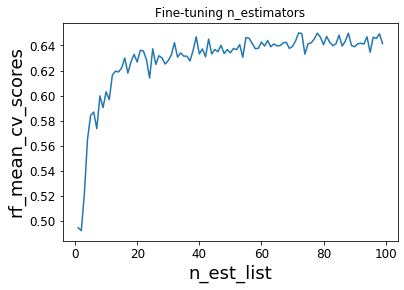

In [152]:
 # Plot Fine-tuning n_estimators for Random Forest Classifier 
plt.title('Fine-tuning n_estimators')
plt.plot(n_est_list,rf_mean_cv_scores, "-")
plt.xlabel("n_est_list", fontsize=18)
plt.ylabel("rf_mean_cv_scores", fontsize=18)
plt.show()

In [153]:
#For testing only 
rf_clf = RandomForestClassifier(n_estimators= 100)
rf_cv_score = cross_val_score(rf_clf, X, y, cv = 10, scoring ='accuracy',n_jobs= -1)

print("Mean cv Score - Random Forest: ", rf_cv_score.mean())

Mean cv Score - Random Forest:  0.6761542543293726


In [154]:
# Fit the rf_clf on the training set
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [155]:
# Get feature_importances of rf for all features
for name, score in zip(game_data, rf_clf.feature_importances_):
    print(name, score)

Platform 0.043527284786686174
Year_of_Release 0.04120795848280269
Genre 0.03758970043238106
Publisher 0.020051046190062243
NA_Sales 0.03249254177897339
EU_Sales 0.04494476001604734
JP_Sales 0.05185762538595819
Other_Sales 0.06361721450621512
Critic_Score 0.002829057560431089
Critic_Count 0.00020524654075893318
User_Score 0.008949972175171147
User_Count 0.006506821380665944
Developer 0.0033574697751524705
Rating 0.005182790020139361


In [156]:
# Make predictions on test set
y_pred = rf_clf.predict(X_test)

In [157]:
# Get classification report # Note: You must import the related module from sklearn to run this cell!
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       418
           1       0.68      0.36      0.47       173
           2       0.65      0.76      0.70       465
           3       0.80      0.67      0.73       309

    accuracy                           0.71      1365
   macro avg       0.72      0.66      0.67      1365
weighted avg       0.72      0.71      0.71      1365



### Part II Questions

Answer the following question HERE:

Q1 [3 points] - According to `feature_importance` of rf classifier, (which works based on the average impurity reduction of the feature across all trees of the forest) what are the most important features in predicting Rating? Name top five.
    - Other_Sales
    - JP_Sales
    - Platform
    - EU_Sales
    - Year_of_Release

Q2 [2 points]- According to your plot, what is the best range for n_estimators?
               - The best range for n_estimator is from 45 to 56 which has a value of .67
               - The nest best range for n_estimtor is from 19-45 and then 58-100 which stays between .65-.66

Q3 [3 points] - According to the classification report of rf classifier, which classes are relatively easier to classify? Compare different metrics of each class label that you see in the classification report.


Different ways to measure the performance of your classified. Text summary of the precision, recall, F1 score for each class (each class is a row). Precision is how many true positives you get over the number of true positives plus false positives. Be recall is true positives over true positives plus false negatives . You want to maximize recall when you’re more concerned about getting false negatives. But maximize precision when you’re more worried about getting false positives. When both are important you can use f 1 score which is a combo of the two. Macro -Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.weighted average (averaging the support-weighted mean per label).

Looking at the different class from 0 to 3 we can stated that:
class 0 the overall precision, recall and F-1, are those of the positive class
class 1 the overall precision, recall and F-1, are those of the negative class
class 2 the overall precision, recall and F-1, are those of the positive class
class 3 the overall precision, recall and F-1, are those of the positive class

## Part III - Multi-Class Classification Using SVM and Kernels

In Part III, you're going to use SVM and kernels for multi-class classification.

To use [SVM implementation from scikit-learn](https://scikit-learn.org/stable/modules/svm.html#multi-class-classification), you need to use OvO or OvR strategies.

Remember from the lectures that SVM can be linear or non-linear using kernels. [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) is the implementation of SVM for the case of a linear kernel.

Note that [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) does not accept keyword kernel, as this is assumed to be linear. It implements OvR multi-class strategy and uses it by default, thus training n_class models and the runtime is usually less than OvO strategy although for this dataset, it may still take a few minutes to run.

## <font color="red"> Required Coding

In [25]:
# Build a linear SVM - You may start with default hyperparameters,
# but you should fine-tune them to get at least 0.65 for mean cv score
lin_svm_clf = svm.LinearSVC()

In [26]:
# Perform a 10-fold cross validation
# Hint: cross validation should be done on the whole dataset
lin_svm_cv_score = cross_val_score(lin_svm_clf, X, y, cv = 10, n_jobs= -1)
print("Mean cv Score - Linear SVM: ", lin_svm_cv_score.mean())

Mean cv Score - Linear SVM:  0.6729426124672082


In [48]:
# Now fine-tune C hyperparameter as follows:

# 1- Write a for loop that iterates over C from 1 to 100
# 2- In each iteration, do 5-fold cv and calculate lin_svm_cv_score.mean()
# and append it to the list svm_mean_cv_scores
# 3- Finally, plot svm_mean_cv_scores on y-axis versus C_values on x-axis
# Your plot should have title "Fine-tuning C Hyperparameter", and label for each axis
# Incomplete plots will get ZERO credit!

# NOTE: Depending on your computer speed, running this may take well more than an hour or even more!

svm_mean_cv_scores = []
C_values = range(1, 100)

for i in C_values:
    lin_svm_clf = svm.LinearSVC(C=i)
    lin_svm_cv_score = cross_val_score(lin_svm_clf, X, y, cv = 5, n_jobs= -1)
    lin_svm_cv_mean = lin_svm_cv_score.mean()
    svm_mean_cv_scores.append(lin_svm_cv_mean)


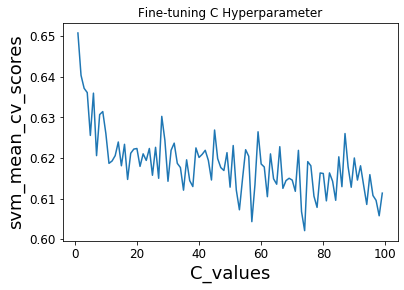

In [49]:
 # Plot Fine-tuning C for Random Forest Classifier 
plt.title('Fine-tuning C Hyperparameter')
plt.plot(C_values, svm_mean_cv_scores, "-")
plt.xlabel("C_values", fontsize=18)
plt.ylabel("svm_mean_cv_scores", fontsize=18)
plt.show() 

In [128]:
#For testing only
lin_svm_clf = svm.LinearSVC(C=1)
lin_svm_cv_score = cross_val_score(lin_svm_clf, X, y, cv = 5, n_jobs= -1)
print("Mean cv Score - Linear SVM: ", lin_svm_cv_score.mean())

Mean cv Score - Linear SVM:  0.6525562844732653


In [129]:
#For testing only
lin_svm_clf = svm.LinearSVC(C=5)
lin_svm_cv_score = cross_val_score(lin_svm_clf, X, y, cv = 5, n_jobs= -1)
print("Mean cv Score - Linear SVM: ", lin_svm_cv_score.mean())

Mean cv Score - Linear SVM:  0.6339585827418834


> Now, let's try [kernel svm](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on this problem. Fine-tune C hyperparameter with at least 3 values {1, 10, 100}.

In [122]:
# Build a kernel svm with rbf kernel
# Note: You should specify ovo strategy, see the example in documentation section 1.4.1.1
# https://scikit-learn.org/stable/modules/svm.html#multi-class-classification
rbf_svm_clf = svm.SVC(kernel='rbf',decision_function_shape='ovo' )

In [123]:
# Perform a 10-fold cross validation
# Hint: cross validation should be done on the whole dataset
rbf_svm_cv_score = cross_val_score(rbf_svm_clf, X, y, cv = 10,n_jobs= -1)

print("Mean cv Score - Kernel SVM - RBF: ", rbf_svm_cv_score.mean())

Mean cv Score - Kernel SVM - RBF:  0.6601138002396734


In [162]:
# Build a kernel svm with polynomial kernel cx
poly_svm_clf = svm.SVC(kernel='poly', decision_function_shape='ovo',C=100, degree=2,max_iter=100)

In [163]:
# Perform a 10-fold cross validation
# Hint: cross validation should be done on the whole dataset
poly_svm_cv_score = cross_val_score(poly_svm_clf, X, y, cv = 10, n_jobs= -1)

print("Mean cv Score - Kernel SVM - Poly: ", poly_svm_cv_score.mean())

Mean cv Score - Kernel SVM - Poly:  0.6720041431140971


### Part III Questions

Anwser the following question HERE:

Q1 [2 points] - According to the plot, what is the best range of values for C hyperparameter of linear SVM?
    - The best range of calues for C hyperparameter is from 1-3. After that it starts decreasing in it prediction. 

Q2 [2 points] - Acording to your experiments, which non-linear kernel worked better on this dataset? Was it better to use linear svm or kernel svm on this dataset?
    - Based on my experiments Linear SVM performed the best followed by kernel svm with rbf kernel. The worse perofrmance was kernel svm with poly kernel. I couldnt get it past its thresold of 65.

## Grading

Assignment-2 has a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part I preprocessing: 10 points (if you don't get the correct X and y, your whole assignment will get no credit!

- Part II Random Forests - 40 points
    - Implementation and training: 12 points
    - Fine-tuning plot: 20 points
    - Questions: 8 points

- Part III SVM and Kernels - 50 points
    - Implementation and training: 26 points
    - Fine-tuning C plot: 20 points
    - Questions: 4 points

<b>Note: </b>Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A2.ipynb```. Submit the completed notebook using the ```Assignment-2``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Saturday March 14th, 11:59PM.</b></font>